# Validation : Panjabi thoracic spine (1976)
#### Model validation information
- Performed by : Ali Riazi
- Reviewed by : Johan Iraeus and Bengt Pipkorn

Added to SAFER HBM Validation Catalog on : 2024-01-17

Recent update : 2024-01-17
#### Summary: 
- The simulation of axial tension and compression is conducted for 11 functional spine units(FSU) of thoracic from T1-T2 to T11-T12, following the experimental approach of Panjabi et al., 1976

Ref: Panjabi MM, Brand RA, White III AA (1976) Mechanical Properties of the Human Thoracic Spine – As Shown by Three‐
Dimensional Load‐Displacement Curves. Journal of Bone and Joint Surgery 58‐A(5): 642–652.

<div>
<img src="Capture.PNG" width="400"/>
</div>


## Experiment description
## Information on the specimens
Specimens were used from five individual PMHS(3 male and 2 female).
| Subjects | Sex | Age | Body mass(kg) | FSU used |
| --- | --- | --- | --- | --- |
| S-9  | Female | 18 | 68 | T1-T2 |
| S-15 | Male | 59 | 84 | T4-T5, T10-T11 |
| S-17 | Male | 38 | 68 | T5-T6, T7-T8, T9-T10, T11-T12 |
| S-20 | Female | 49 | 57 | T2-T3, T6-T7, T8-T9 |
| S-26 | Male | 44 | 109 | T3-T4 |
#### Positioning: 
- The upper vertebrae was constrained in the middle using a threaded rod and the lower vertebrae was fixed into a potting cup

### Loading and Boundary Conditions
- The lower potting cup was fixed
- The loads were applied to the upper vertebra through the threaded rod, to a maximum value of 160 N 

### Responses recorded
- Reaction forces at the lower potting cup
- Displacement of threaded rod


### SAFER HBM Version: `11.0`


# Setup and prerequisites 

In [8]:
import os
import glob
import numpy
import sys
import glob
# for data analysis
import pandas as pd
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)


## Variable declaration

In [9]:
# Path to existing binouts

Sim_Tests = ['T1_T2_axial_tension','T2_T3_axial_tension','T3_T4_axial_tension','T4_T5_axial_tension','T5_T6_axial_tension','T6_T7_axial_tension','T7_T8_axial_tension',
             'T8_T9_axial_tension','T9_T10_axial_tension','T10_T11_axial_tension','T11_T12_axial_tension',
             'T1_T2_axial_compression','T2_T3_axial_compression','T3_T4_axial_compression','T4_T5_axial_compression','T5_T6_axial_compression','T6_T7_axial_compression','T7_T8_axial_compression',
             'T8_T9_axial_compression','T9_T10_axial_compression','T10_T11_axial_compression','T11_T12_axial_compression']

Exp_Tests = ['tension_panjabi','compression_panjabi'] 

figures_dir = "results/figures/"
processed_data_dir = f"data/processed/"
experiment_dir= f"../experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for test in Sim_Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


# Postprocessing with dynasaur

In [10]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [11]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_ID.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/Postprocess.def"]

## Extracting Time Series 

In [12]:
# Intialize a DataVisualizationController object, by passing the following argument 
#  -  binout files (data_source) 
#  -  list of dynasaur definition files (object_def_file, calculation_procedure_def_file)
sim_output={}
exp={}
exp_t = {}
for test in Sim_Tests:
    sim_M = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim_M.get_defined_calculation_procedures()
    print(commands)
    for command in sim_M.get_defined_calculation_procedures():
        sim_M.calculate(command)
    # export post-processed data
    sim_M.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    # Import processed data
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/Postprocess.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_ID.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read bndout data ...
[READ BINOUT]	done reading bndout!
[READ BINOUT]	read rbdout data ...
[READ BINOUT]	done reading rbdout!
[{'visualization': 'Lower_Pot_force_non_filter_z', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Upper_Pot_disp_non_filter_z', 'x_label': 'time', 'y_label': 'Displacement'}]
[CALCULATION]	Calculating Visualization: Lower_Pot_force_non_filter_z
[DATA]	read id 2300001 from channel name: z_force
[CALCULATION]	Calculating Visualization: Upper_Pot_disp_non_filter_z
[DATA]	read id 6300001 from channel name: global_dz
[CALCULATION]	DATA VISUALIZATION writing csv to data/processed/T1_T2_axial_tension
[CALCULATION]	DATA VISUALIZATION done writing csv to data/processed/T1_T2_axial_tension\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/Postprocess.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read 

### Input Experimental data

In [13]:
exp = {}
for test in Exp_Tests:
    tmp = test + '.csv'
    exp[test] = pd.read_csv(os.path.join(experiment_dir,tmp),header = None)
    exp[test][1] = exp[test][1]/1000*160
    del(tmp)
max_index = {}
for test in Sim_Tests:
    max_index[test] = sim_output[test].Lower.Pot_force_non_filter_z.force[abs(abs(sim_output[test].Lower.Pot_force_non_filter_z.force.values) - 0.16) < .0035].index[-1]

### Plotting

Maximum displacement of the simulation setup obtained at 160N axial force is compared with the exprimental result of Panjabi 1976.

### Axial Tension

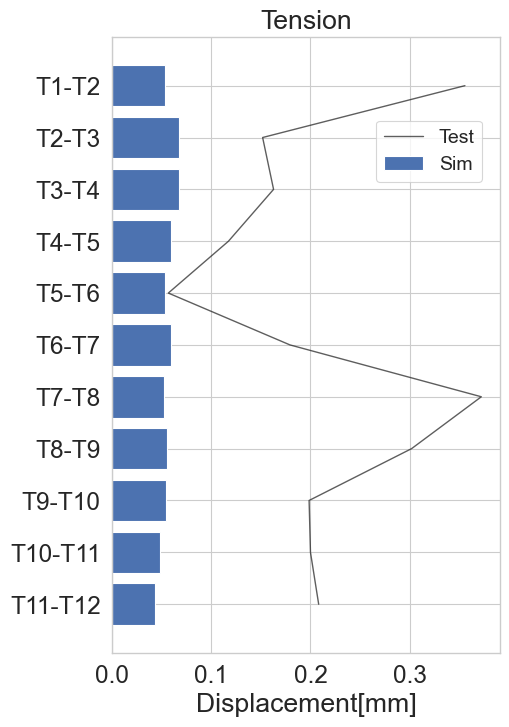

In [15]:
fig = plt.figure(figsize = (5, 8))
plt.xlabel('Displacement[mm]')
plt.title('Tension')
j = 0
test1 = ['T1-T2','T2-T3','T3-T4','T4-T5','T5-T6','T6-T7','T7-T8','T8-T9','T9-T10','T10-T11','T11-T12']
Sim_Tests_rev = list(reversed(Sim_Tests[0:11]))
test1_rev = list(reversed(test1))
for test in Sim_Tests_rev:
    plt.barh(test1_rev[j],sim_output[test].Upper.Pot_disp_non_filter_z.Displacement.iloc[max_index[test]], color = 'b' )
    j = j + 1
plt.plot(exp['tension_panjabi'][1],test1,linestyle = '-', color = 'k', alpha =  0.7, linewidth = 1)
plt.legend(['Test','Sim'],bbox_to_anchor=(0.98,0.88),fontsize=14)
fig.savefig(os.path.join(figures_dir, 'Figure_v11.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

### Axial Compression

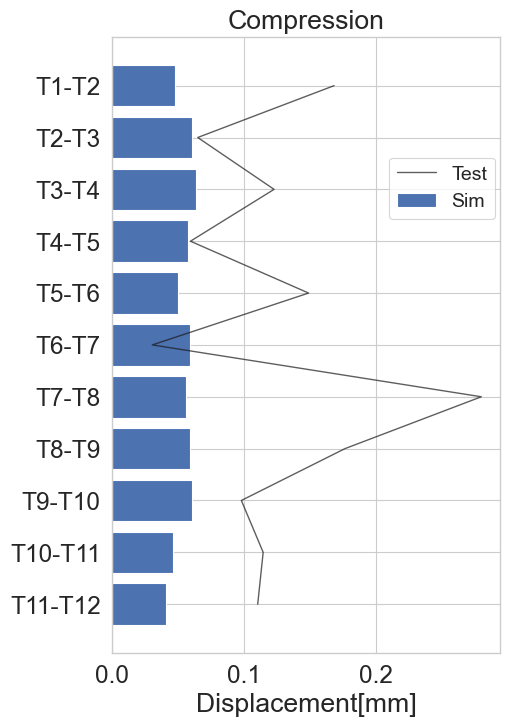

In [16]:
fig = plt.figure(figsize = (5, 8))
plt.xlabel('Displacement[mm]')
plt.title('Compression')
j = 0
test1 = ['T1-T2','T2-T3','T3-T4','T4-T5','T5-T6','T6-T7','T7-T8','T8-T9','T9-T10','T10-T11','T11-T12']
Sim_Tests_rev = list(reversed(Sim_Tests[11:22]))
test1_rev = list(reversed(test1))
for test in Sim_Tests_rev:
    plt.barh(test1_rev[j],-sim_output[test].Upper.Pot_disp_non_filter_z.Displacement.iloc[max_index[test]], color = 'b' )
    j = j + 1
plt.plot(exp['compression_panjabi'][1],test1,linestyle = '-', color = 'k', alpha =  0.7, linewidth = 1)
plt.legend(['Test','Sim'],bbox_to_anchor=(0.69,0.82),fontsize=14)
fig.savefig(os.path.join(figures_dir, 'Figure_v11.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")